# 1. Описательная статистика

In [88]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

## 13_6

### Данные

In [15]:
data = pd.read_csv('data/13_6', sep='\t', header=None, names=['type', 'yearmonth', 'buyers_6', 'buyers_13', 'shop'])

# separate month from year
data = pd.concat([data, data['yearmonth'].str.split(', ', expand=True).set_axis(['year', 'month'], axis=1, inplace=False)], axis=1)

# compute 13-6 diff
data['diff_13_6'] = data['buyers_13'] - data['buyers_6']

data = data.astype({'year': np.float, 'diff_13_6': np.float})

display(data.head())
display(data.describe())

,type,yearmonth,buyers_6,buyers_13,shop,year,month,diff_13_6
0,shopping,"1990, July",4942,4882,Epsom,1990.00,July,-60.00
1,shopping,"1991, September",4895,4736,Epsom,1991.00,September,-159.00
2,shopping,"1991, December",4805,4784,Epsom,1991.00,December,-21.00
3,shopping,"1992, March",4570,4603,Epsom,1992.00,March,33.00
4,shopping,"1992, November",4506,4629,Epsom,1992.00,November,123.00


,buyers_6,buyers_13,year,diff_13_6
count,45.00,45.00,45.00,45.00
mean,4970.51,5017.00,1991.20,46.49
std,1165.62,1172.89,0.76,174.98
min,3558.00,3554.00,1990.00,-302.00
25%,3954.00,3926.00,1991.00,-47.00
50%,4805.00,4736.00,1991.00,11.00
75%,6026.00,6162.00,1992.00,136.00
max,7138.00,7057.00,1992.00,774.00


### Среднее, медиана, дисперсия

In [4]:
from functools import partial

pd.options.display.float_format = '{:.1f}'.format
data.agg({'buyers_13': [np.mean, np.median, np.var]})

,buyers_13
mean,5017.0
median,4736.0
var,1375666.5


In [5]:
print(f'correct var: {np.var(data.buyers_13, ddof=0):.1f}')

correct var: 1345096.1


### Разница между 13 и 6: среднее, эксцесс, асимметрия

In [16]:
diff = data['diff_13_6']

pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame({'mean': np.mean(diff), 'kurt': scipy.stats.kurtosis(diff), 'skew': scipy.stats.skew(diff)}, index=['diff'])

,mean,kurt,skew
diff,46.49,4.96,1.47


### Визуализация

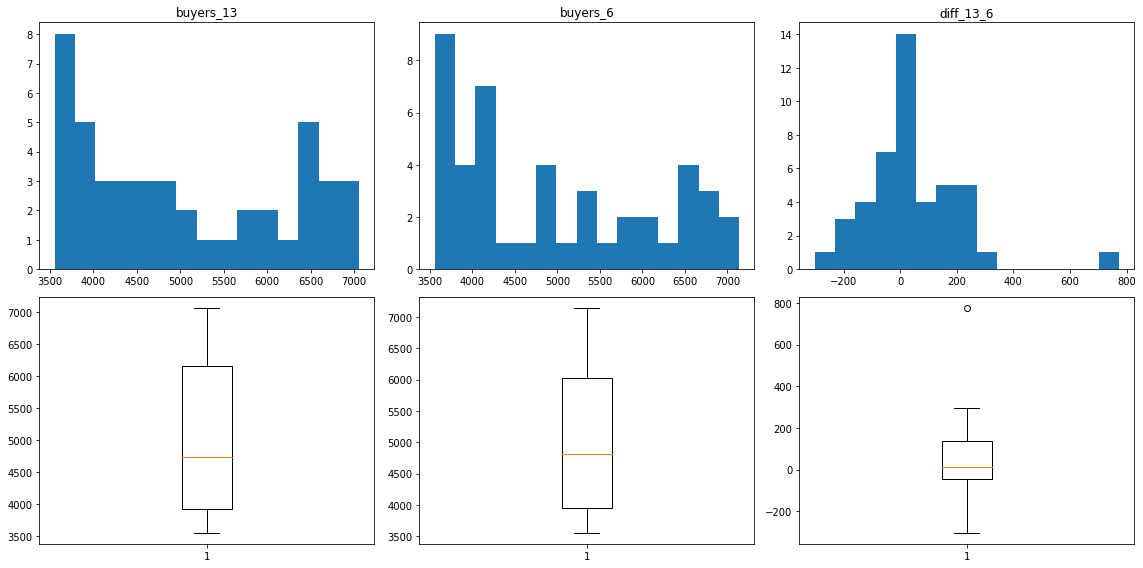

In [41]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))

ax[0][0].hist('buyers_13', data=data, bins=15)
ax[0][1].hist('buyers_6', data=data, bins=15)
ax[0][2].hist('diff_13_6', data=data, bins=15)

ax[1][0].boxplot('buyers_13', data=data)
ax[1][1].boxplot('buyers_6', data=data)
ax[1][2].boxplot('diff_13_6', data=data)

ax[0][0].set_title('buyers_13')
ax[0][1].set_title('buyers_6')
ax[0][2].set_title('diff_13_6')

fig.tight_layout()

## Colleges

### Данные

In [42]:
data = pd.read_csv('data/colleges.txt', sep='\t')

In [46]:
display(data.head())
display(data.dtypes)

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


School         object
School_Type    object
SAT             int64
Acceptance      int64
$/Student       int64
Top 10%         int64
%PhD            int64
Grad%           int64
dtype: object

In [53]:
np.unique(data['School_Type'].values)

array(['Lib Arts', 'Univ'], dtype=object)

### Визуализация: boxplot

#### Вторая попытка

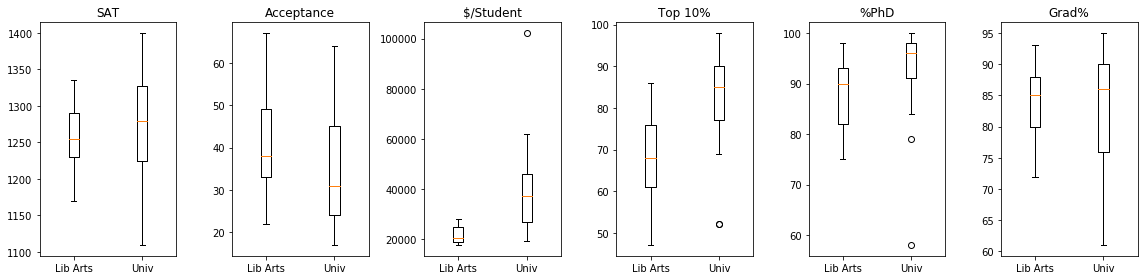

In [81]:
columns = ['SAT', 'Acceptance', '$/Student', 'Top 10%', '%PhD', 'Grad%']
stypes = np.unique(data['School_Type'].values)
fig, ax = plt.subplots(1, len(columns), figsize=(16, 4))

# Side-by-side
for j, colname in enumerate(columns):
    ax[j].boxplot([
        data[data['School_Type'] == stypes[0]][colname],
        data[data['School_Type'] == stypes[1]][colname]
    ], labels=stypes)
    ax[j].set_title(colname)

fig.tight_layout()

#### Первая попытка, для истории (неудобно и некорректно: разные масштабы)

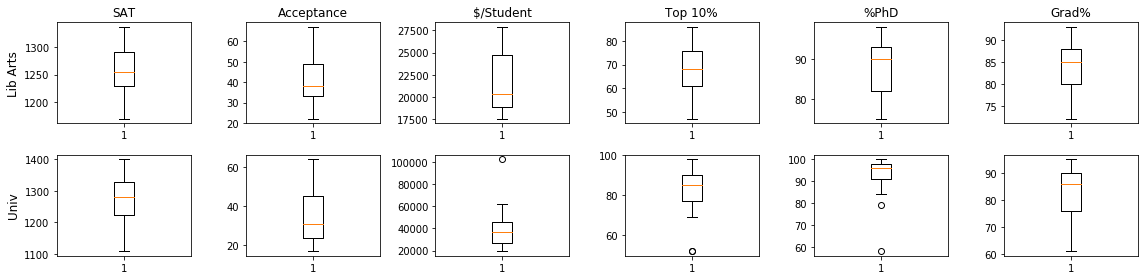

In [127]:
columns = ['SAT', 'Acceptance', '$/Student', 'Top 10%', '%PhD', 'Grad%']
stypes = np.unique(data['School_Type'].values)
fig, ax = plt.subplots(2, len(columns), figsize=(16, 4))

for i, stype in enumerate(stypes):
    for j, colname in enumerate(columns):
        ax[i][j].boxplot(data[data['School_Type'] == stype][colname])
        
# Set titles for the rows and columns
for axis, colname in zip(ax[0], columns):
    axis.set_title(colname)
for axis, row in zip(ax[:,0], stypes):
    axis.set_ylabel(row, size='large')     
    
fig.tight_layout()

### Визуализация: hist

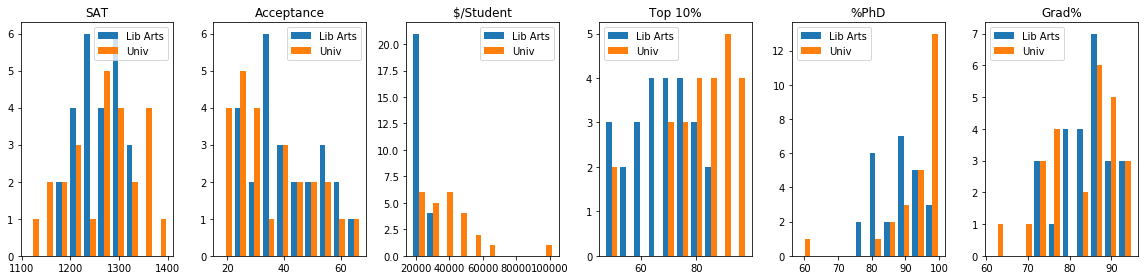

In [115]:
columns = ['SAT', 'Acceptance', '$/Student', 'Top 10%', '%PhD', 'Grad%']
stypes = np.unique(data['School_Type'].values)
fig, ax = plt.subplots(1, len(columns), figsize=(16, 4))

for j, colname in enumerate(columns):
    ax[j].hist([
        data[data['School_Type'] == stypes[0]][colname],
        data[data['School_Type'] == stypes[1]][colname]
    ], label=stypes)
    ax[j].legend()
    ax[j].set_title(colname)
    
fig.tight_layout()

### Статистики

In [126]:
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame({
    'mean of SAT, Lib Arts': data[data['School_Type'] == 'Lib Arts']['SAT'].mean(),
    '3rd quartile of acceptance, Univ': np.quantile(data[data['School_Type'] == 'Univ']['Acceptance'], 0.75),
    'Univ with max $/Student': data.iloc[data['$/Student'].idxmax()]['School']
}, index=['value'])

,"mean of SAT, Lib Arts","3rd quartile of acceptance, Univ",Univ with max $/Student
value,1256.64,45.00,Cal Tech
